# Import packages

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import h5py
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading and converting the dataset

In [2]:
# Define the file names
hdf_file_name = '/Users/shrued/Workspace/CS5110/Final Project/msd_summary_file.h5'
csv_file_name = 'songs.csv'

# Open the HDF5 file
with h5py.File(hdf_file_name, 'r') as f:
    # Read the datasets into DataFrames
    analysis_df = pd.DataFrame(f['/analysis/songs'][:])
    metadata_df = pd.DataFrame(f['/metadata/songs'][:])
    musicbrainz_df = pd.DataFrame(f['/musicbrainz/songs'][:])

# Merge the DataFrames
hdf_df = pd.concat([analysis_df, metadata_df, musicbrainz_df], axis=1)

# Convert the DataFrame to CSV format
hdf_df.to_csv(csv_file_name, index=True)

# Read the CSV file
df = pd.read_csv(csv_file_name, index_col=0)

# Viewing the dataset

In [3]:
print ("Number of Rows: %d"%len(df))
print ("Number of Columns: %d"%len(df.columns))
# Display the first few rows of the merged DataFrame
df.head()

Number of Rows: 1000000
Number of Columns: 53


,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid,idx_artist_mbtags,year
0,22050,b'aee9820911781c734e7694c5432990ca',0.0,252.05506,2.049,0.0,0,0,0,0,...,0,0,b'Monster Ballads X-Mas',633681,0.542899,b'SOQMMHC12AB0180CB8',b'Silent Night',7032331,0,2003
1,22050,b'ed222d07c83bac7689d52753610a513a',0.0,156.55138,0.258,0.0,0,0,0,0,...,0,0,b'Karkuteill\xc3\xa4',145266,0.299877,b'SOVFVAK12A8C1350D9',b'Tanssi vaan',1514808,0,1995
2,22050,b'96c7104889a128fef84fa469d60e380c',0.0,138.97098,0.000,0.0,0,0,0,0,...,0,0,b'Butter',625706,0.617871,b'SOGTUKN12AB017F4F1',b'No One Could Ever',6945353,0,2006
3,22050,b'0f7da84b6b583e3846c7e022fb3a92a2',0.0,145.05751,0.000,0.0,0,0,0,0,...,0,0,b'De Culo',199368,NaN,b'SOBNYVR12A8C13558C',b'Si Vos Quer\xc3\xa9s',2168257,0,2003
4,22050,b'228dd6392ad8001b0281f533f34c72fd',0.0,514.29832,0.000,0.0,0,0,0,0,...,0,0,b'Rene Ablaze Presents Winter Sessions',209038,NaN,b'SOHSBXH12A8C13B0DF',b'Tangle Of Aspens',2264873,0,0


# Data Preprocessing

In [4]:
# Check for missing values
df.isnull().sum()

analysis_sample_rate                   0
audio_md5                              0
danceability                           0
duration                               0
end_of_fade_in                         0
energy                                 0
idx_bars_confidence                    0
idx_bars_start                         0
idx_beats_confidence                   0
idx_beats_start                        0
idx_sections_confidence                0
idx_sections_start                     0
idx_segments_confidence                0
idx_segments_loudness_max              0
idx_segments_loudness_max_time         0
idx_segments_loudness_start            0
idx_segments_pitches                   0
idx_segments_start                     0
idx_segments_timbre                    0
idx_tatums_confidence                  0
idx_tatums_start                       0
key                                    0
key_confidence                         0
loudness                               0
mode            

In [5]:
#Drop rows with year = 0
df = df.drop(df[df.year == 0].index)
#Drop rows with song hotness = 0
df = df.drop(df[df.song_hotttnesss==0].index)

In [6]:
# Check for missing values
df.isnull().sum()

# Drop columns with NaN or infinite values
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

# Check for duplicate records
df.duplicated().sum()

# Check data types
df.dtypes

# Drop columns
def drop_cols(df):
    cols = ['analysis_sample_rate','danceability','energy','genre','artist_7digitalid','audio_md5','analyzer_version','artist_latitude','artist_location','artist_longitude','artist_playmeid','track_7digitalid','release_7digitalid','key_confidence','mode_confidence','time_signature_confidence']
    df = df.drop(cols,axis=1)
    idx_cols = 'idx_'
    return df[df.columns.drop(list(df.filter(regex=idx_cols)))].reset_index(drop=True)
df = drop_cols(df)

# Check data range
df.describe()

analysis_sample_rate                   0
audio_md5                              0
danceability                           0
duration                               0
end_of_fade_in                         0
energy                                 0
idx_bars_confidence                    0
idx_bars_start                         0
idx_beats_confidence                   0
idx_beats_start                        0
idx_sections_confidence                0
idx_sections_start                     0
idx_segments_confidence                0
idx_segments_loudness_max              0
idx_segments_loudness_max_time         0
idx_segments_loudness_start            0
idx_segments_pitches                   0
idx_segments_start                     0
idx_segments_timbre                    0
idx_tatums_confidence                  0
idx_tatums_start                       0
key                                    0
key_confidence                         0
loudness                               0
mode            

0

analysis_sample_rate                int64
audio_md5                          object
danceability                      float64
duration                          float64
end_of_fade_in                    float64
energy                            float64
idx_bars_confidence                 int64
idx_bars_start                      int64
idx_beats_confidence                int64
idx_beats_start                     int64
idx_sections_confidence             int64
idx_sections_start                  int64
idx_segments_confidence             int64
idx_segments_loudness_max           int64
idx_segments_loudness_max_time      int64
idx_segments_loudness_start         int64
idx_segments_pitches                int64
idx_segments_start                  int64
idx_segments_timbre                 int64
idx_tatums_confidence               int64
idx_tatums_start                    int64
key                                 int64
key_confidence                    float64
loudness                          

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,artist_familiarity,artist_hotttnesss,song_hotttnesss,year
count,111766.000000,111766.000000,111766.000000,111766.00000,111766.000000,111766.000000,111766.000000,111766.000000,111766.000000,111766.000000,111766.000000,111766.000000
mean,242.845343,0.876801,5.280694,-9.69814,0.672816,233.421946,125.240104,3.601972,0.628419,0.430649,0.485518,1998.174194
std,112.206876,2.881594,3.577044,4.97372,0.469187,109.863954,35.016282,1.213383,0.107007,0.086022,0.155880,10.782023
min,1.122810,0.000000,0.000000,-48.05700,0.000000,1.123000,0.000000,0.000000,0.000000,0.000000,0.187708,1924.000000
25%,181.602810,0.000000,2.000000,-12.31000,0.000000,173.499000,99.026250,3.000000,0.563980,0.380710,0.367273,1994.000000
50%,227.499950,0.200000,5.000000,-8.63500,1.000000,217.966000,122.021000,4.000000,0.623857,0.421388,0.485988,2002.000000
75%,280.913830,0.432000,9.000000,-6.02400,1.000000,270.110500,146.563000,4.000000,0.692380,0.474767,0.597375,2006.000000
max,2999.509750,358.214000,11.000000,1.21500,1.000000,2943.808000,280.955000,7.000000,0.948290,1.082503,1.000000,2010.000000


In [7]:
# Apply the function to all object type columns
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].applymap(lambda x: x.encode().decode('utf-8').strip("b'"))

In [8]:
# Drop rows with missing values
df = df.dropna().reset_index(drop=True)
# df.isnull().sum()

In [9]:
print ("Number of Rows: %d"%len(df))
print ("Number of Columns: %d"%len(df.columns))
# Display the first few rows of the merged DataFrame
df.head()

Number of Rows: 111766
Number of Columns: 19


,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,track_id,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_name,release,song_hotttnesss,song_id,title,year
0,138.97098,0.000,7,-2.060,1,138.971,177.768,4,TRMMMRX128F93187D9,0.643681,0.437504,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,Butter,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,2006
1,262.26893,0.194,11,-3.925,1,259.419,122.332,4,TRMMMKI128F931D80D,0.529819,0.410229,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,Lena 20 \xc3\x85r,0.212045,SOSDCFG12AB0184647,006,1998
2,216.47628,2.032,6,-14.379,1,208.062,99.214,4,TRMMMUT128F42646E8,0.685503,0.446733,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,Cover Girl,0.270776,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,1994
3,196.02240,0.000,8,-6.366,1,185.202,189.346,7,TRMMMQY128F92F0EA3,0.734471,0.511976,ARGWPP11187B9AEF43,f76167bb-c117-4022-8b6b-54c796edf5c9,Dying Fetus,Descend Into Depravity,0.614766,SOKOVRQ12A8C142811,Ethos of Coercion,2009
4,372.42730,0.000,7,-6.663,1,355.062,191.665,3,TRMMMKQ128F92EBCB5,0.740252,0.472691,AR79L0D1187FB3AFB6,39822e8d-f24e-4f07-b51b-28b22e59fbd,Kreator,Violent revolution,0.788727,SOOLRHW12A8C142643,All of the same blood,2001


In [10]:
df.dtypes

duration              float64
end_of_fade_in        float64
key                     int64
loudness              float64
mode                    int64
start_of_fade_out     float64
tempo                 float64
time_signature          int64
track_id               object
artist_familiarity    float64
artist_hotttnesss     float64
artist_id              object
artist_mbid            object
artist_name            object
release                object
song_hotttnesss       float64
song_id                object
title                  object
year                    int64
dtype: object

# Exploratory Analysis

<Figure size 700x700 with 0 Axes>

<Axes: >

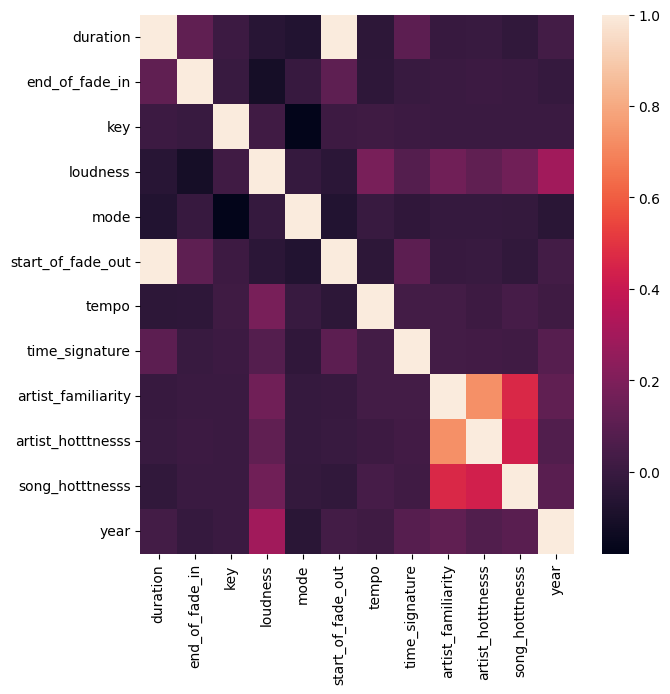

In [11]:
# Select only the numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr = df[num_cols].corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr)

array([[<Axes: title={'center': 'year'}>]], dtype=object)

Text(0.5, 1.0, 'Distribution of Release Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

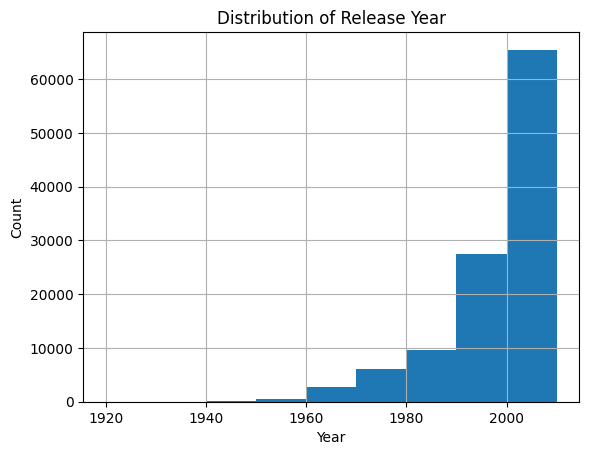

In [12]:
bins = range(1920, 2020, 10)
df.hist(column='year', bins=bins)
plt.title("Distribution of Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Popularity Distribution')

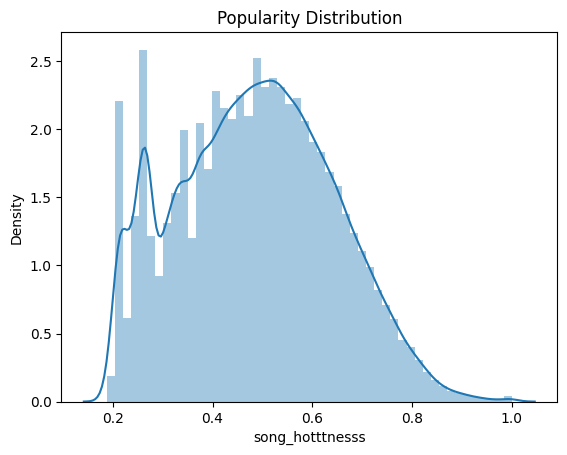

In [13]:
sns.distplot(df['song_hotttnesss']).set_title('Popularity Distribution')

<Axes: xlabel='time_signature', ylabel='song_hotttnesss'>

Text(0.5, 1.0, 'Popularity Based on Time Signature')

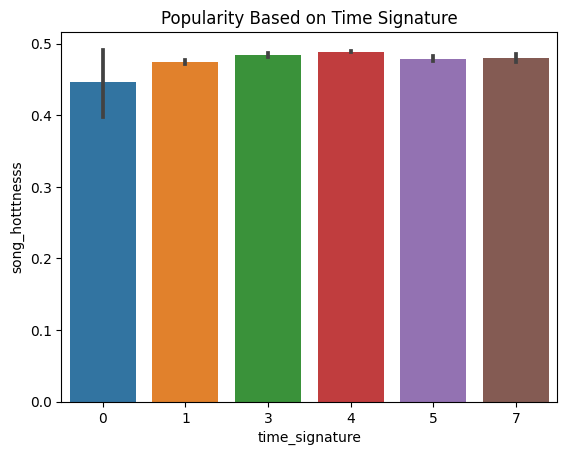

In [14]:
sns.barplot(x = 'time_signature', y = 'song_hotttnesss', data = df)
plt.title('Popularity Based on Time Signature')

<Axes: xlabel='mode', ylabel='song_hotttnesss'>

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

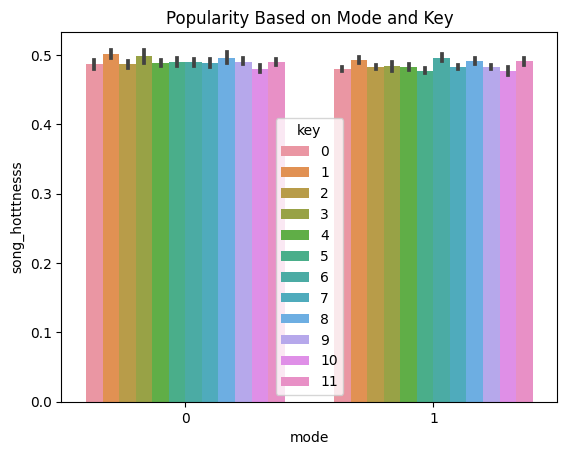

In [15]:
sns.barplot(x = 'mode', y = 'song_hotttnesss', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')

Text(0.5, 1.03, 'Relationship between Loudness and Song Hotttnesss')

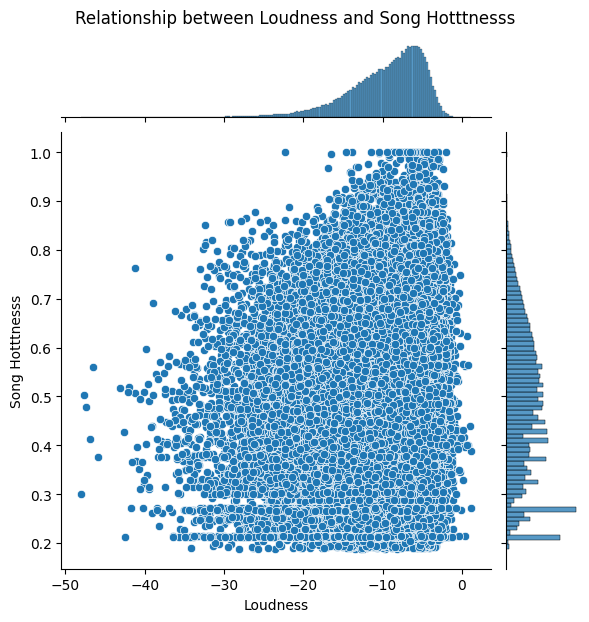

In [16]:
plot = sns.jointplot(x = 'loudness', y = 'song_hotttnesss', data = df)
plot.set_axis_labels('Loudness', 'Song Hotttnesss')
plot.fig.suptitle('Relationship between Loudness and Song Hotttnesss', y=1.03)

# Model fitting and predicting

## Regression

### Predict the popularity score of a song using features of the songs.

To predict the popularity score of a song, select features and target variable, split the data into training and testing sets, and then train different regression models such as Linear Regression, Decision Tree Regression, Random Forest Regression, and Support Vector Regression using the selected features. Finally, evaluate the models' performance using R-squared, MSE, and MAE metrics.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# select features and target variable
features = ["duration", "end_of_fade_in", "key", "loudness", "mode", "start_of_fade_out", "tempo", "time_signature", "artist_familiarity", "artist_hotttnesss", "year"]
target = "song_hotttnesss"

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# initialize the models
models = [("Linear Regression", LinearRegression()),
          ("Decision Tree Regression", DecisionTreeRegressor(random_state=42)),
          ("Random Forest Regression", RandomForestRegressor(n_estimators=100, random_state=42)),
          ("Support Vector Regression", SVR(kernel="linear"))]

# train and evaluate the models
for name, model in models:
    # fit the model
    model.fit(X_train, y_train)
    
    # make predictions on the test set
    y_pred = model.predict(X_test)
    
    # evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # print the results
    print(f"{name}:")
    print(f"R-squared: {r2:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print()

LinearRegression()

Linear Regression:
R-squared: 0.25
MSE: 0.02
MAE: 0.11



DecisionTreeRegressor(random_state=42)

Decision Tree Regression:
R-squared: -0.02
MSE: 0.02
MAE: 0.11



RandomForestRegressor(random_state=42)

Random Forest Regression:
R-squared: 0.50
MSE: 0.01
MAE: 0.08



SVR(kernel='linear')

Support Vector Regression:
R-squared: -38.69
MSE: 0.96
MAE: 0.68



Based on the metrics above, the random forest regressor seems to perform the best out of the models tested with an R-squared value of 0.50, MSE of 0.01, and MAE of 0.08. The linear regression model has a lower R-squared value of 0.25, while the decision tree regression and SVR models have negative R-squared values, indicating that these models perform worse than simply guessing the mean value. It is important to note that the performance of these models may vary depending on the specific dataset and features used. Additionally, other models such as gradient boosting or neural networks may also be worth exploring.

## Classification 

### Predict whether a song will be above or below the mean of song popularity scores of the data, using features of the songs.

To calculate the mean song popularity score, assigns labels based on the mean score, select features and target variables, split the data into training and testing sets, and then build a model to predict whether a song will be above or below the mean song popularity score using the selected features. Finally, evaluate the model's accuracy and confusion matrix.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# calculate the mean song popularity score
mean_score = df["song_hotttnesss"].mean()

# assign labels based on the mean score
df["label"] = df["song_hotttnesss"].apply(lambda x: 1 if x >= mean_score else 0)

# select features and target variable
features = ["duration", "end_of_fade_in", "key", "loudness", "mode", "start_of_fade_out", "tempo", "time_signature", "artist_familiarity", "artist_hotttnesss", "year"]
target = "label"

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# initialize and fit the models
models = {"Linear SVM": LinearSVC(random_state=42),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "Logistic Regression": LogisticRegression(random_state=42)}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    confusion = confusion_matrix(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion matrix:\n{confusion}")
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")

LinearSVC(random_state=42)

Linear SVM:
Accuracy: 0.5063
Confusion matrix:
[[11317     1]
 [11036     0]]
Classification report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67     11318
           1       0.00      0.00      0.00     11036

    accuracy                           0.51     22354
   macro avg       0.25      0.50      0.34     22354
weighted avg       0.26      0.51      0.34     22354



DecisionTreeClassifier(random_state=42)

Decision Tree:
Accuracy: 0.7105
Confusion matrix:
[[7964 3354]
 [3117 7919]]
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     11318
           1       0.70      0.72      0.71     11036

    accuracy                           0.71     22354
   macro avg       0.71      0.71      0.71     22354
weighted avg       0.71      0.71      0.71     22354



RandomForestClassifier(random_state=42)

Random Forest:
Accuracy: 0.7587
Confusion matrix:
[[8653 2665]
 [2730 8306]]
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     11318
           1       0.76      0.75      0.75     11036

    accuracy                           0.76     22354
   macro avg       0.76      0.76      0.76     22354
weighted avg       0.76      0.76      0.76     22354



LogisticRegression(random_state=42)

Logistic Regression:
Accuracy: 0.6306
Confusion matrix:
[[6964 4354]
 [3904 7132]]
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63     11318
           1       0.62      0.65      0.63     11036

    accuracy                           0.63     22354
   macro avg       0.63      0.63      0.63     22354
weighted avg       0.63      0.63      0.63     22354



The best model based on accuracy is the random forest model, with an accuracy of 0.76. 
The Random Forest Classifier has the highest precision, recall, and F1-score for both classes, which indicates that it is better at predicting both true positives and true negatives. The Decision Tree Classifier has a slightly lower accuracy but still performs well, and the Logistic Regression model has the lowest performance among the models tested.

<Figure size 800x500 with 0 Axes>

<Axes: >

(0.0, 1.0)

Text(0.5, 1.0, 'Accuracy of Classification Models')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Accuracy')

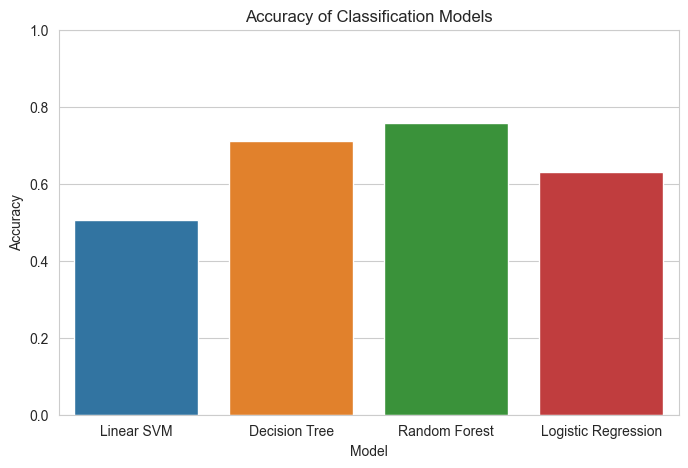

In [19]:
# plot the results
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylim(0, 1)
plt.title("Accuracy of Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()